In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("titanic.txt")

In [ ]:
columns_to_drop = ["PassengerId","Name","Ticket","Cabin","Embarked"]

In [ ]:

data_clean = data.drop(columns_to_drop,axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_clean["Sex"] = le.fit_transform(data_clean["Sex"])

In [ ]:
data_clean = data_clean.fillna(data_clean["Age"].mean())

In [ ]:
input_cols = ['Pclass',"Sex","Age","SibSp","Parch","Fare"]
output_cols = ["Survived"]

X = data_clean[input_cols]
Y = data_clean[output_cols]

print(X.shape,Y.shape)
print(type(X))

(891, 6) (891, 1)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
def entropy(col):
    
    counts = np.unique(col,return_counts=True)
    N = float(col.shape[0])
    
    ent = 0.0
    
    for ix in counts[1]:
        p  = ix/N
        ent += (-1.0*p*np.log2(p))
    
    return ent

In [ ]:
def divide_data(x_data,fkey,fval):
    #Work with Pandas Data Frames
    x_right = pd.DataFrame([],columns=x_data.columns)
    x_left = pd.DataFrame([],columns=x_data.columns)
    
    for ix in range(x_data.shape[0]):
        val = x_data[fkey].loc[ix]
        
        if val > fval:
            x_right = x_right.append(x_data.loc[ix])
        else:
            x_left = x_left.append(x_data.loc[ix])
            
    return x_left,x_right

In [ ]:
def information_gain(x_data,fkey,fval):
    
    left,right = divide_data(x_data,fkey,fval)
    
    #% of total samples are on left and right
    l = float(left.shape[0])/x_data.shape[0]
    r = float(right.shape[0])/x_data.shape[0]
    
    #All examples come to one side!
    if left.shape[0] == 0 or right.shape[0] ==0:
        return -1000000 #Min Information Gain
    
    i_gain = entropy(x_data.Survived) - (l*entropy(left.Survived)+r*entropy(right.Survived))
    return i_gain

In [ ]:
for fx in X.columns:
    print(fx)
    print(information_gain(data_clean,fx,data_clean[fx].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.001158644038169343
SibSp
0.009584541813400071
Parch
0.015380754493137916
Fare
0.042140692838995464


In [ ]:
class DecisionTree:
    
    #Constructor
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
        
    def train(self,X_train):
        
        features = ['Pclass','Sex','Age','SibSp', 'Parch', 'Fare']
        info_gains = []
        
        for ix in features:
            i_gain = information_gain(X_train,ix,X_train[ix].mean())
            info_gains.append(i_gain)
            
        self.fkey = features[np.argmax(info_gains)]
        self.fval = X_train[self.fkey].mean()
        print("Making Tree Features is",self.fkey)
        
        #Split Data
        data_left,data_right = divide_data(X_train,self.fkey,self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
         
        #Truly a left node
        if data_left.shape[0]  == 0 or data_right.shape[0] ==0:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survive"
            else:
                self.target = "Dead"
            return
        #Stop earyly when depth >=max depth
        if(self.depth>=self.max_depth):
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survive"
            else:
                self.target = "Dead"
            return
        
        #Recursive Case
        self.left = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        #You can set the target at every node
        if X_train.Survived.mean() >= 0.5:
            self.target = "Survive"
        else:
            self.target = "Dead"
        return
    
    def predict(self,test):
        if test[self.fkey]>self.fval:
            #go to right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [ ]:
split = int(0.7*data_clean.shape[0])
train_data = data_clean[:split]
test_data = data_clean[split:]
test_data = test_data.reset_index(drop=True)

In [ ]:

dt = DecisionTree()

In [ ]:

dt.train(train_data)

Making Tree Features is Sex
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Parch
Making Tree Features is Pclass
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Parch
Making Tre

In [ ]:
print(dt.fkey)
print(dt.fval)
print(dt.left.fkey)
print(dt.right.fkey)

Sex
0.6292134831460674
Pclass
Fare


In [ ]:
y_pred = []
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))

In [ ]:
y_pred

['Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'De

In [ ]:

y_actual = test_data[output_cols]

In [ ]:
le = LabelEncoder()
y_pred = le.fit_transform(y_pred)

In [ ]:
print(y_pred)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0]


In [ ]:
y_pred = np.array(y_pred).reshape((-1,1))
print(y_pred.shape)

(268, 1)


In [ ]:
acc = np.sum(y_pred==y_actual)/y_pred.shape[0]

In [ ]:
acc = np.sum(np.array(y_pred)==np.array(y_actual))/y_pred.shape[0]

In [ ]:
print(acc)

0.8171641791044776


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
sk_tree = DecisionTreeClassifier(criterion='gini',max_depth=5)

In [ ]:
sk_tree.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:

sk_tree.predict(test_data[input_cols])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0])

In [ ]:

sk_tree.score(test_data[input_cols],test_data[output_cols])

0.8171641791044776

In [ ]:

import pydotplus

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [ ]:
dot_data = StringIO()
export_graphviz(sk_tree,out_file=dot_data,filled=True,rounded=True)

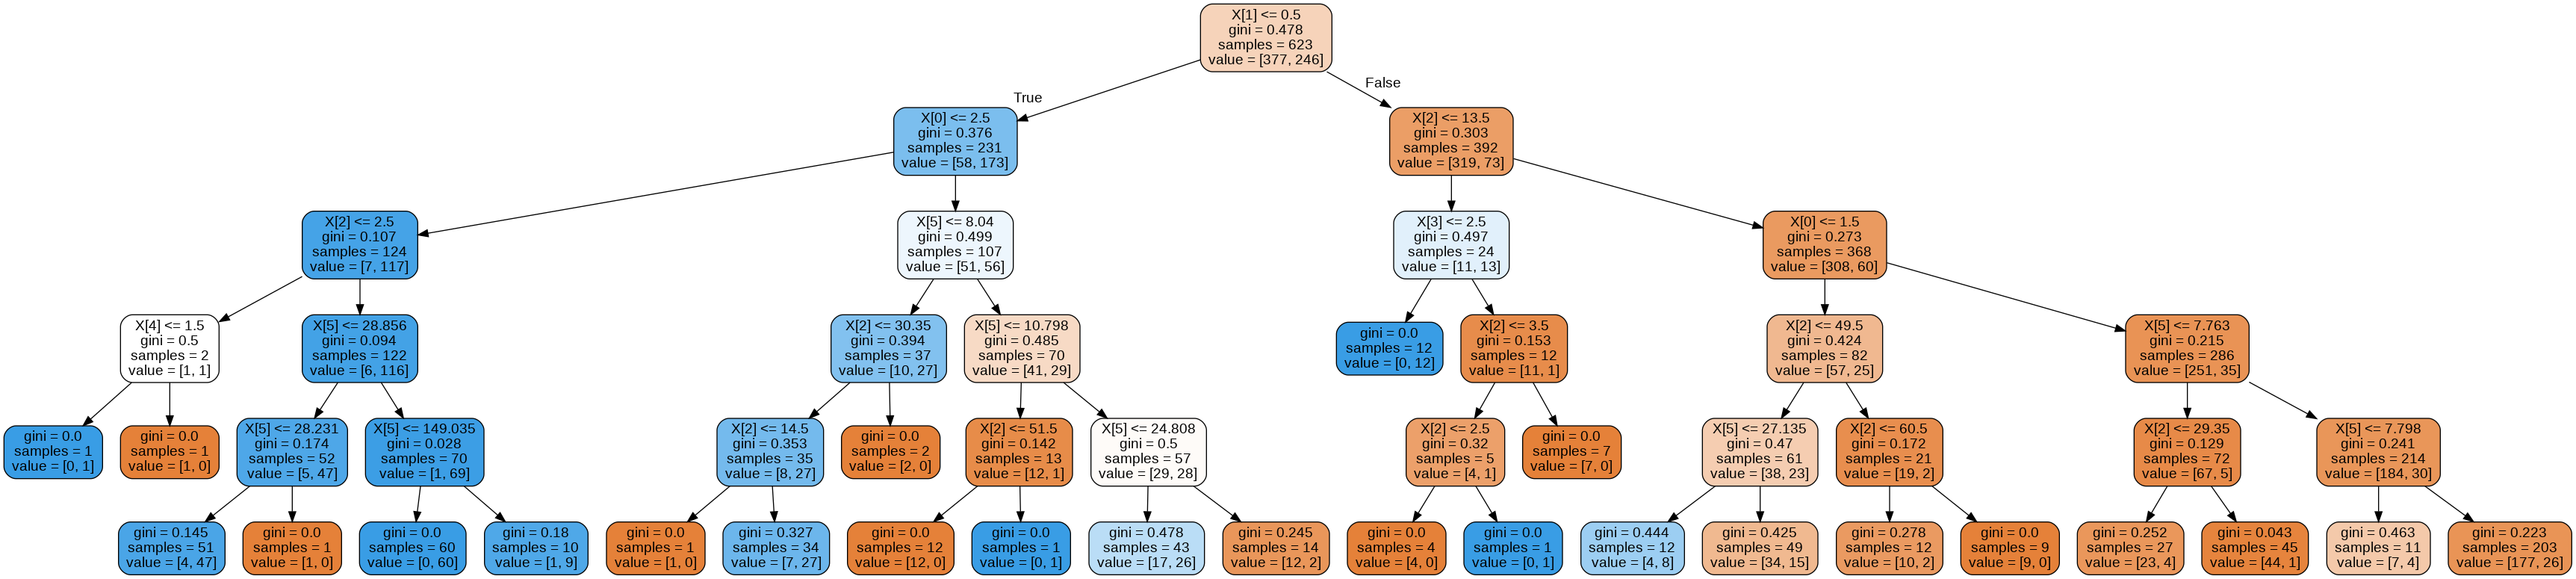

In [ ]:

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:

X_train = train_data[input_cols]
Y_train = np.array(train_data[output_cols]).reshape((-1,))
X_test = test_data[input_cols]
Y_test = np.array(test_data[output_cols]).reshape((-1,))

In [ ]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
sk_tree.fit(X_train,Y_train)
sk_tree.score(X_train,Y_train)

0.8443017656500803

In [ ]:
sk_tree.score(X_test,Y_test)

0.8283582089552238

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5)

In [ ]:

rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:

rf.score(X_train,Y_train)

0.8523274478330658

In [ ]:
rf.score(X_test,Y_test)

0.8208955223880597

In [ ]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(RandomForestClassifier(n_estimators=40,max_depth=5,criterion='entropy'),X_train,Y_train,cv=5).mean()

In [ ]:

print(acc)

0.8217548387096774


In [ ]:
acc_list = []
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=5),X_train,Y_train,cv=5).mean()
    acc_list.append(acc)

In [ ]:
print(acc_list)

[0.7736000000000001, 0.7784516129032258, 0.7752129032258065, 0.8025806451612902, 0.8121032258064517, 0.8121032258064517, 0.8202064516129033, 0.7833290322580645, 0.8137161290322581, 0.8106322580645161, 0.8105935483870967, 0.8026322580645161, 0.8282064516129033, 0.8137419354838709, 0.8138193548387097, 0.8169806451612903, 0.8121806451612903, 0.8153548387096773, 0.8185548387096773, 0.8073935483870969, 0.8169548387096774, 0.8185419354838709, 0.8234580645161291, 0.8153677419354839, 0.8089419354838709, 0.824967741935484, 0.8201548387096775, 0.7993290322580645, 0.8089935483870967, 0.8121290322580645, 0.8234193548387096, 0.8153161290322581, 0.8217935483870967, 0.8057806451612903, 0.8265806451612903, 0.8089548387096773, 0.8137419354838709, 0.8169935483870967, 0.8041290322580645, 0.8265806451612903, 0.8266193548387097, 0.8169677419354839, 0.8233935483870969, 0.8201677419354837, 0.8297935483870968, 0.8250322580645161, 0.8186064516129032, 0.8121419354838709, 0.8105548387096775]


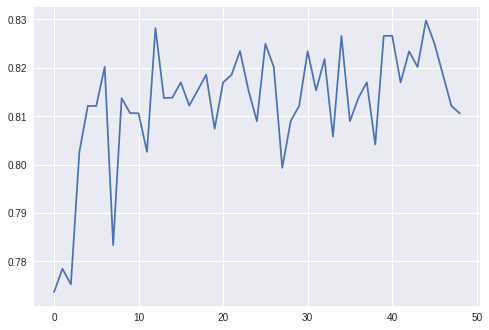

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(acc_list)
plt.show()

In [ ]:
print(np.argmax(acc_list))

44


In [ ]:
rf = RandomForestClassifier(n_estimators=22,max_depth=5,criterion='entropy')
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=22,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:

rf.score(X_train,Y_train)

0.8475120385232745

In [ ]:
rf.score(X_test,Y_test)

0.8246268656716418